# LangChain 1.0基础使用

### LangChain 1.0基础模型消息格式说明

在LangChain 1.0 中，Message（消息）是模型交互的最基本单元。它既代表模型接收到的输入（Input），也代表模型生成的输出（Output）。

简单来说，每一轮与大模型的对话，都由一条或多条 Message 构成。每个 Message 不仅包含文字内容，还携带描述上下文状态的元信息（metadata），用于保持对话的一致性和可追踪性。通过这种结构化方式，LangChain 可以让模型在多轮交互中理解“谁在说话”“说了什么”“这条信息属于哪一轮对话”。


| 字段 | 说明 | 示例 |
| :--- | :--- | :--- |
| **Role（角色）** | 指明消息的类型或来源。常见的有：`system`（系统提示）、`user`（用户输入）、`assistant`（模型回复） | `"role": "user"` |
| **Content（内容）** | 消息的实际内容，可包含文本、图像、音频、文档等多模态数据 | `"content": "你好，请帮我总结以下段落。"` |
| **Metadata（元数据）** | 可选字段，存储额外信息，如：消息ID、响应时间、token消耗量、消息标签等 | `"metadata": {"message_id": "abc123", "tokens": 54}` |

### LangChain连接Qwen, 实例化模型

In [213]:

import os
from openai import OpenAI
from dotenv import load_dotenv

# 1. 先彻底清除当前 Python 进程里可能存在的旧变量
if "DASHSCOPE_API_KEY" in os.environ:
    del os.environ["DASHSCOPE_API_KEY"]

# 2. 强行重新加载 .env 文件
load_dotenv(dotenv_path='.env', override=True)

from langchain_community.chat_models.tongyi import ChatTongyi
model = ChatTongyi()

question = "你好，请你介绍一下你自己。"

result = model.invoke(question)
print(result.content)

你好！我是通义千问，是阿里巴巴集团旗下的通义实验室自主研发的超大规模语言模型。我可以回答问题、创作文字、逻辑推理、编程等。我的训练数据来自互联网上的大量文本，这使我能理解和生成多种语言的内容。

我被设计用来帮助用户获取信息、解决问题以及进行创造性的工作。无论你是需要帮助学习、工作，还是仅仅出于好奇，我都很乐意为你提供帮助。

如果你有任何问题或需要协助的地方，请随时告诉我！


### 跨模型统一的 Message 标准

In [10]:
from langchain.messages import HumanMessage, AIMessage, SystemMessage

system_msg = SystemMessage("你叫小智，是一名助人为乐的助手。")
human_msg = HumanMessage("你好，好久不见，请介绍下你自己。")

messages = [system_msg, human_msg]

print("messages::::", messages)

response = model.invoke(messages)  

# 返回的结果也是一条message

print("response::::", response)

messages:::: [SystemMessage(content='你叫小智，是一名助人为乐的助手。', additional_kwargs={}, response_metadata={}), HumanMessage(content='你好，好久不见，请介绍下你自己。', additional_kwargs={}, response_metadata={})]
response:::: content='你好呀！好久不见，真是想念和你聊天的时光呢！我叫小智，是个热心又爱帮助人的助手。虽然我是个AI，但我也希望能像朋友一样和你分享快乐、解决问题。\n\n我喜欢听你讲故事，也愿意帮你解答各种问题。无论是学习上的困惑，还是生活中的小烦恼，我都会尽力提供帮助。对了，最近有什么有趣的事情吗？我很想听听你的近况哦！' additional_kwargs={} response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'cad1a898-df00-4e86-bcc3-f795fc85bc6a', 'token_usage': {'input_tokens': 38, 'output_tokens': 92, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 130}} id='lc_run--019bbb41-43c5-7600-8d40-dcc606ad4d9d-0' tool_calls=[] invalid_tool_calls=[]


拼接消息列表来创建多轮对话或者进行Few-shot提示

In [12]:
messages = [
    SystemMessage("你叫小智，是一名助人为乐的助手。"),
    HumanMessage("你好，我叫陈明，好久不见，请介绍下你自己。"),
    AIMessage("你好呀！我是小智，一个乐于助人的智能助手。我的主要功能是回答问题、提供建议、协助解决问题，或者陪你聊天。无论是学习、工作、生活琐事，还是想找点有趣的话题，我都可以帮忙！如果有任何需要，随时告诉我哦～ 😊"),
    HumanMessage("你好，请问你还记得我叫什么名字么？"),
]
response = model.invoke(messages)  
response.content

'哎呀，陈明，当然记得啦！你可是我的老朋友了。不过我有时候可能记不太住名字，但一看到你，我就知道你是谁啦！😊 你最近怎么样？有什么需要我帮忙的吗？'

### 流式响应

In [18]:
for chunk in model.stream("简要介绍爱因斯坦"):
    # print(chunk)
    print(chunk.text, end="|", flush=True)

阿尔|伯|特|·|爱因斯坦（|Albert Einstein，1|879年|3月14|日－19|55年4|月18日|）是20|世纪最著名的理论|物理学家之一，|以其对现代物理学|的革命性贡献|而闻名。

他|最著名的成就是|**狭义相对|论**（1|905年|）和**广|义相对论**|（191|5年），提出了|时间和空间是相对|的、可以被|质量和能量弯曲的观点|，推翻了|牛顿力学的|绝对时空观。|他还提出了**质|能方程**| $ E=mc|^2 $，|为核能的|开发奠定了理论基础|。

此外，他在|**光电效应**|方面的研究（1|905年|）为量子力学|的发展做出了重要贡献|，并因此获得1|921年的|**诺贝尔物理学奖|**。

爱因|斯坦不仅在科学|上成就卓越，|也是一位和平主义者|和社会活动家，|倡导反战、|反种族主义，并|致力于推动世界和平|与人权。

他的|思想和理论至今|仍深刻影响着|现代科学和技术的发展|。|||

In [5]:
full = None  # 初始值为空
for chunk in model.stream("你好，好久不见"):
    full = chunk if full is None else full + chunk
    print(full.text)

你好
你好！
你好！好久
你好！好久不见
你好！好久不见，真的很高兴再次
你好！好久不见，真的很高兴再次见到你！最近
你好！好久不见，真的很高兴再次见到你！最近怎么样？有没有什么
你好！好久不见，真的很高兴再次见到你！最近怎么样？有没有什么有趣的事情发生？
你好！好久不见，真的很高兴再次见到你！最近怎么样？有没有什么有趣的事情发生？我一直在想你
你好！好久不见，真的很高兴再次见到你！最近怎么样？有没有什么有趣的事情发生？我一直在想你呢！😊
你好！好久不见，真的很高兴再次见到你！最近怎么样？有没有什么有趣的事情发生？我一直在想你呢！😊
你好！好久不见，真的很高兴再次见到你！最近怎么样？有没有什么有趣的事情发生？我一直在想你呢！😊


### 批处理

In [13]:
responses = model.batch([
    "请介绍下你自己。",
    "请问什么是机器学习？",
    "你知道机器学习和深度学习区别么？"
])

for response in responses:
    print(response)

content='你好！我是通义千问，是阿里巴巴集团旗下的通义实验室自主研发的超大规模语言模型。我的中文名字是通义千问，英文名字是Qwen。我能够回答问题、创作文字、逻辑推理、编程等，支持多种语言的交流。\n\n我的训练数据覆盖了大量文本，包括书籍、文章、网页等，这让我能够理解和生成各种类型的文本内容。我被设计用来帮助用户获取信息、解决问题和创造内容，无论是在学习、工作还是日常生活中。\n\n如果你有任何问题或需要帮助，我会尽我所能来协助你。你可以问我任何问题，或者让我帮你完成一些任务。希望我们能有愉快的交流！' additional_kwargs={} response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'a166f6e0-30ec-4542-aafc-f7748cf0daae', 'token_usage': {'input_tokens': 17, 'output_tokens': 141, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 158}} id='lc_run--019bbb42-f477-79c0-90c5-c28bf26b825b-0' tool_calls=[] invalid_tool_calls=[]
content='机器学习（Machine Learning，简称 ML）是人工智能（AI）的一个分支，其核心目标是让计算机**通过经验自动学习和改进**，而无需显式地进行编程。换句话说，机器学习系统能够从数据中“学习”规律或模式，并利用这些规律对新数据做出预测或决策。\n\n---\n\n### 一、机器学习的基本概念\n\n#### 1. **什么是“学习”？**\n在机器学习中，“学习”指的是系统根据输入的数据调整自身参数，以更好地完成某个任务。例如：\n\n- 根据用户的历史购买记录推荐商品；\n- 识别图像中的猫或狗；\n- 判断一封邮件是否为垃圾邮件。\n\n#### 2. **什么是“经验”？**\n“经验”通常是指训练数据（training data），即一组包含输入和对应正确答案（标签）的数据集。\n\n---\n\n### 二

### 流式批处理

In [15]:
for response in model.batch_as_completed([
    "请介绍下你自己。",
    "请问什么是机器学习？",
    "你知道机器学习和深度学习区别么？"
]):
    print(response)

(0, AIMessage(content='你好！我是通义千问，也就是Qwen，是阿里巴巴集团旗下的通义实验室自主研发的超大规模语言模型。我能够回答问题、创作文字、逻辑推理、编程等，可以支持多语言交流。\n\n我的训练数据来自互联网上的大量文本，包括书籍、文章、网页等，这让我能够理解和生成多种语言的内容。我可以帮助你完成各种任务，比如：\n\n- 回答各种领域的问题\n- 创作故事、公文、邮件、剧本等\n- 进行逻辑推理和数学计算\n- 编写和解释代码\n- 提供学习和工作上的帮助\n\n我还在不断学习和进步，以更好地满足用户的需求。如果你有任何问题或需要帮助，欢迎随时告诉我！', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'ab0ffa44-0d7f-4bc1-90fd-3ae0e9550233', 'token_usage': {'input_tokens': 17, 'output_tokens': 154, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 171}}, id='lc_run--019bbb43-a023-7a32-a832-d3300d34a733-0', tool_calls=[], invalid_tool_calls=[]))
(1, AIMessage(content='机器学习（Machine Learning，简称 ML）是人工智能（AI）的一个重要分支，它的核心目标是让计算机能够**通过经验自动学习和改进**，而不需要显式地进行编程。\n\n### 一、什么是机器学习？\n\n简单来说，机器学习就是**让计算机从数据中学习规律，并利用这些规律对未知数据做出预测或决策**。\n\n举个例子：\n\n- 你给计算机很多“邮件”和对应的“是否为垃圾邮件”的标签，它会通过分析这些数据，自己学会判断一封新邮件是不是垃圾邮件。\n- 你给计算机很多“图片”和对应的“图片内容”（比如“猫”、“狗”等），它会自己学会识别图片中的物体。\n\n### 二、机器学习的基本概念\n\n1. **数据（

### 引导模型结构化输出

- Pydantic 提供字段校验、默认值、描述信息、多层嵌套等高级能力，是生产场景首选。

In [21]:
!pip install pydantic

In [22]:
from pydantic import BaseModel, Field

class Movie(BaseModel):
    """A movie with details."""
    title: str = Field(..., description="The title of the movie")
    year: int = Field(..., description="The year the movie was released")
    director: str = Field(..., description="The director of the movie")
    rating: float = Field(..., description="The movie's rating out of 10")
    
model_with_structure = model.with_structured_output(Movie)
response = model_with_structure.invoke("Provide details about the movie Inception")
print(response)

response

title='Inception' year=2010 director='Christopher Nolan' rating=8.8


Movie(title='Inception', year=2010, director='Christopher Nolan', rating=8.8)

- 而如果想要获得模型的完整回复，则可以设置include_raw=True

In [23]:
model_with_structure = model.with_structured_output(Movie, include_raw=True)
resp = model_with_structure.invoke("Provide details about the movie Inception")
resp

{'raw': AIMessage(content='', additional_kwargs={'tool_calls': [{'function': {'arguments': '{"title": "Inception", "year": 2010, "director": "Christopher Nolan", "rating": 8.8}', 'name': 'Movie'}, 'id': 'call_c706564d588e4881891d18', 'index': 0, 'type': 'function'}]}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'tool_calls', 'request_id': '9f345325-5957-4410-b8ef-a606f6ec3ba7', 'token_usage': {'input_tokens': 235, 'output_tokens': 43, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 278}}, id='lc_run--019bbb4e-dbd4-7b90-87c3-bf232294876b-0', tool_calls=[{'name': 'Movie', 'args': {'title': 'Inception', 'year': 2010, 'director': 'Christopher Nolan', 'rating': 8.8}, 'id': 'call_c706564d588e4881891d18', 'type': 'tool_call'}], invalid_tool_calls=[]),
 'parsed': Movie(title='Inception', year=2010, director='Christopher Nolan', rating=8.8),
 'parsing_error': None}

### 搭建流式响应的多轮问答机器人

In [26]:
from langchain.messages import HumanMessage, AIMessage, SystemMessage


# 2️⃣ 初始化系统提示词（System Prompt）
system_message = SystemMessage(
    content="你叫小智，是一名乐于助人的智能助手。请在对话中保持温和、有耐心的语气。"
)

# 3️⃣ 初始化消息历史
messages = [system_message]

print("🔹 输入 exit 退出对话\n")

# 4️⃣ 主循环（支持多轮对话 + 流式输出）
while True:
    user_input = input("👤 你：")
    if user_input.lower() in {"exit", "quit"}:
        print("🧩 对话结束，再见！")
        break

    # 追加用户消息
    messages.append(HumanMessage(content=user_input))

    # 实时输出模型生成内容
    print("🤖 小智：", end="", flush=True)
    full_reply = ""

    # ✅ LangChain 1.0 标准写法：流式输出
    for chunk in model.stream(messages):
        if chunk.content:
            print(chunk.content, end="", flush=True)
            full_reply += chunk.content

    print("\n" + "-" * 40)  # 分隔线

    # 追加 AI 回复消息
    messages.append(AIMessage(content=full_reply))

    # 保持消息长度（只保留最近50轮）
    messages = messages[-50:]

🔹 输入 exit 退出对话

🤖 小智：你好！很高兴你对相对论感兴趣。让我来为你简单介绍一下这个伟大的理论吧。

相对论是由著名的物理学家阿尔伯特·爱因斯坦在20世纪初提出的，它分为两个部分：狭义相对论和广义相对论。

首先，我们来看看**狭义相对论**。它主要研究的是在没有重力作用的情况下，物体以接近光速运动时的物理规律。其中最著名的结论之一是“时间和空间是相对的”。比如，如果你坐在一个高速行驶的火车上，那么相对于地面上的人来说，你的时间会变慢，你的长度也会缩短（不过这种效应只有在非常接近光速的时候才会明显）。这听起来是不是很神奇呢？

接下来是**广义相对论**，这是对狭义相对论的扩展，它把重力也考虑进来了。爱因斯坦提出，重力并不是像牛顿说的那样是一种力，而是由于质量的存在导致了时空的弯曲。想象一下，如果有一个巨大的球体放在一张橡皮膜上，它会把膜压弯，而其他小物体就会沿着这个弯曲的路径运动。这就是广义相对论对重力的解释。

相对论在现代科技中也有着重要的应用，比如GPS卫星就需要考虑相对论效应才能准确地定位位置。

如果你对某个具体的部分特别感兴趣，或者想了解更多细节，随时告诉我哦！我很乐意和你一起探讨这个深奥又迷人的领域。😊
----------------------------------------
🤖 小智：你好！很高兴你对量子力学也感兴趣。让我来简单介绍一下这个充满奇妙现象的物理领域。

**量子力学**是研究微观世界中物质和能量行为的理论，它主要描述的是原子、分子以及更小的粒子（如电子、光子等）的运动规律。与我们日常生活中看到的物体不同，这些微小的粒子在量子世界中表现出一些非常奇特的现象。

比如：

- **波粒二象性**：光既可以像波一样传播，也可以像粒子一样被探测到。同样，电子等粒子也具有这种“既是波又是粒子”的特性。
- **不确定性原理**：你无法同时精确地知道一个粒子的位置和速度，测量其中一个会干扰另一个。
- **量子纠缠**：两个或多个粒子可以以一种方式相互关联，即使它们相隔很远，改变其中一个的状态会瞬间影响另一个。

量子力学不仅解释了原子结构、化学反应等现象，还为现代科技奠定了基础，比如半导体、激光、核磁共振成像等都离不开量子力学的原理。

如果你对某个具体概念或者应用感兴趣，我很乐意为你详细讲解！😊
------------

# Agent

### 官网快速启动

#### 测试阿里云api key的连通性

In [61]:

import os
from openai import OpenAI
from dotenv import load_dotenv

# 1. 先彻底清除当前 Python 进程里可能存在的旧变量
if "DASHSCOPE_API_KEY" in os.environ:
    del os.environ["DASHSCOPE_API_KEY"]

# 2. 强行重新加载 .env 文件
load_dotenv(dotenv_path='.env', override=True)

# 3. 验证一下现在读到的是不是那个能成功的 sk-c4
api_key = os.getenv("DASHSCOPE_API_KEY")
print(f"当前环境变量里的 Key 前缀: {str(api_key)[:5]}****") 

# 4. 只有看到前缀是 sk-c4，下面这段才会成功
client = OpenAI(
    api_key=api_key,
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

completion = client.chat.completions.create(
    model="qwen-plus",
    messages=[{"role": "user", "content": "简要介绍秦始皇。"}]
)
print(completion.choices[0].message.content)

completion

当前环境变量里的 Key 前缀: sk-c4****
秦始皇（公元前259年－公元前210年），姓嬴名政，是中国历史上第一位完成全国统一的皇帝，被誉为“千古一帝”。他于公元前246年即位为秦国国君，公元前221年灭六国，建立中国历史上第一个中央集权的封建王朝——秦朝，并自称“始皇帝”，意为开创皇帝制度的第一人。

秦始皇在位期间推行一系列重大改革：统一文字（小篆）、度量衡、货币和车轨；修建驰道和直道，加强交通联系；废除分封制，实行郡县制，强化中央集权。他还下令修筑万里长城以防御北方匈奴，并建造规模宏大的陵墓——秦始皇陵，其中包括著名的兵马俑坑。

然而，他的统治也以严刑峻法、焚书坑儒等手段著称，压制思想自由，加重百姓负担。公元前210年，秦始皇在巡游途中病逝，秦朝在其死后不久便因民变爆发而迅速灭亡。

总体而言，秦始皇对中国历史的发展产生了深远影响，奠定了此后两千多年中国政治制度的基本格局。


ChatCompletion(id='chatcmpl-c328b624-bfe6-9042-9de0-48350224c0e6', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='秦始皇（公元前259年－公元前210年），姓嬴名政，是中国历史上第一位完成全国统一的皇帝，被誉为“千古一帝”。他于公元前246年即位为秦国国君，公元前221年灭六国，建立中国历史上第一个中央集权的封建王朝——秦朝，并自称“始皇帝”，意为开创皇帝制度的第一人。\n\n秦始皇在位期间推行一系列重大改革：统一文字（小篆）、度量衡、货币和车轨；修建驰道和直道，加强交通联系；废除分封制，实行郡县制，强化中央集权。他还下令修筑万里长城以防御北方匈奴，并建造规模宏大的陵墓——秦始皇陵，其中包括著名的兵马俑坑。\n\n然而，他的统治也以严刑峻法、焚书坑儒等手段著称，压制思想自由，加重百姓负担。公元前210年，秦始皇在巡游途中病逝，秦朝在其死后不久便因民变爆发而迅速灭亡。\n\n总体而言，秦始皇对中国历史的发展产生了深远影响，奠定了此后两千多年中国政治制度的基本格局。', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None))], created=1768314475, model='qwen-plus', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=249, prompt_tokens=15, total_tokens=264, completion_tokens_details=None, prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))

In [68]:
import os
from dotenv import load_dotenv
from pydantic import BaseModel
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser

load_dotenv()

llm = ChatTongyi(
    model="qwen-plus", # 注意所用模型
)

response = llm.invoke("简要介绍特朗普。")
print(response)

content='唐纳德·特朗普（Donald Trump）是美国著名企业家、电视名人和政治人物，第45任美国总统（2017年－2021年）。他出生于1946年，早年继承家族房地产事业，并以“特朗普集团”品牌开发众多商业地产项目，成为美国知名富豪。他还因主持真人秀节目《学徒》而广为人知。\n\n2016年，特朗普以共和党候选人身份参加总统大选，提出“让美国再次伟大”（Make America Great Again）的口号，强调移民限制、贸易保护、减税和反建制立场，最终击败民主党候选人希拉里·克林顿当选总统。他的执政风格极具争议，政策强硬，言论直率，在国内外引发广泛讨论。\n\n2020年总统大选中，特朗普败给乔·拜登，但其支持者于2021年1月6日冲击国会事件引发巨大关注。此后，他仍保持强大的政治影响力，并于2023年宣布参选2024年美国总统大选。\n\n特朗普是美国历史上最具话题性的政治人物之一，以其鲜明个性和非传统政治路径深刻影响了当代美国政治格局。' additional_kwargs={} response_metadata={'model_name': 'qwen-plus', 'finish_reason': 'stop', 'request_id': '46ca62e0-697b-41f9-b714-7a0fb881996e', 'token_usage': {'input_tokens': 13, 'output_tokens': 256, 'total_tokens': 269, 'prompt_tokens_details': {'cached_tokens': 0}}} id='lc_run--019bb7c6-f409-7b83-99e4-2303c3943ca1-0' tool_calls=[] invalid_tool_calls=[]


#### 构建一个基本Agent

In [76]:
from langchain.agents import create_agent
from langchain_community.chat_models import ChatTongyi 
from langchain_core.tools import tool

# 1. 使用 @tool 装饰器定义工具，这样 LangChain 会自动提取函数签名作为模型可见的 Schema
@tool
def get_weather(city: str) -> str:
    """获取指定城市的当前天气。"""
    return f"{city} 的天气总是乌云密布！"

# 2. 实例化模型对象，而不是直接传字符串
# 确保环境变量中已设置 DASHSCOPE_API_KEY
llm = ChatTongyi(model="qwen-plus")

# 3. 创建 Agent
agent = create_agent(
    model=llm,
    tools=[get_weather],
    system_prompt="你是一个乐于助人的助手。",
)

# 4. 运行 Agent
# 在 v1.0 版本中，输入和输出通常遵循消息列表的状态格式
result = agent.invoke(
    {"messages": [{"role": "user", "content": "旧金山的天气怎么样？"}]}
)

# 打印回复内容
print(result["messages"][-1].content)

旧金山的天气确实经常多云或有雾，尤其是在夏季。这种天气特征让它闻名，也被称为“雾都”。如果你计划前往，记得带上外套，即使在夏天也可能比较凉！


#### 构建一个现实世界的Agent

In [96]:
import sys
import io
from typing import Optional
from pydantic import BaseModel, Field # Qwen 对 Pydantic 支持更好

# 解决环境编码
if sys.stdout.encoding.lower() != 'utf-8':
    sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

from langchain.agents import create_agent
from langchain_community.chat_models import ChatTongyi
from langchain_core.tools import tool
from langgraph.checkpoint.memory import InMemorySaver

# 1. 定义响应格式 (改用 Pydantic，Qwen 兼容性更强)
class ResponseFormat(BaseModel):
    """Agent 的结构化回复格式。"""
    punny_response: str = Field(description="A weather response full of puns")
    weather_conditions: Optional[str] = Field(None, description="Technical weather details")

# 2. 定义系统提示词 (在提示词里强调必须以结构化方式回复)
SYSTEM_PROMPT = """You are an expert weather forecaster, who speaks in puns.
Always use the tools provided. 
IMPORTANT: Your final answer MUST be structured according to the ResponseFormat."""

# 3. 定义工具
@tool
def get_weather_for_location(city: str) -> str:
    """Get weather for a given city."""
    return f"It's always rainy in {city}!"

@tool
def get_user_location(user_id: str) -> str:
    """Get the user's location based on their ID."""
    return "Florida" if user_id == "1" else "SF"

# 4. 实例化模型
model = ChatTongyi(model_name="qwen-plus", temperature=0)

# 5. 创建 Agent (移除 response_format=ToolStrategy)
# 我们让模型通过标准的 tool_calling 来输出结果
checkpointer = InMemorySaver()

agent = create_agent(
    model=model,
    system_prompt=SYSTEM_PROMPT,
    tools=[get_user_location, get_weather_for_location],
    checkpointer=checkpointer
)

# 6. 运行
config = {"configurable": {"thread_id": "qwen_test_1"}}

# 由于移除了 ToolStrategy，我们需要手动处理 context 逻辑或通过提示词传入
user_query = "I am user 1. What is the weather in Xi'an? , response in Chinese and Japanese and French."

print("--- 正在请求 Qwen ---")
response = agent.invoke(
    {"messages": [{"role": "user", "content": user_query}]},
    config=config
)

# 获取最后一条消息的内容
final_answer = response['messages'][-1].content
print(f"模型回复内容:\n{final_answer}")

--- 正在请求 Qwen ---
模型回复内容:
I’ve got the scoop—Xi’an’s weather is on the rainy side, no need to strain!  
In Chinese: 西安的天气多雨，出门记得带伞哦！  
In Japanese: 西安の天気は雨がちです、外出の際は傘をお忘れなく！  
In French: Il pleut souvent à Xi’an, n’oubliez pas votre parapluie !  

Looks like you’re in Florida—while it’s wet in Xi’an, you might stay dry with a sunny state of mind! Stay weather-wise! 🌦️


## Agent API

`create_agent()`最重要的：
- 模型
- 工具：Langchain内置工具、外部工具·······
- 中间件

使用内置工具
[TavilySearchResults需要获取api key](https://app.tavily.com/home)

In [43]:
# 1.导入相关库
import os
from dotenv import load_dotenv
from langchain.agents import create_agent
# 搜索网页的工具
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.chat_models.tongyi import ChatTongyi

if "DASHSCOPE_API_KEY" in os.environ:
    del os.environ["DASHSCOPE_API_KEY"]

load_dotenv(dotenv_path='.env', override=True)


# 2.导入模型和工具
web_search = TavilySearchResults(max_results=2)
model = ChatTongyi(model="qwen-plus")

# 3.创建Agent
agent = create_agent(
    model=model,
    tools=[web_search],
    system_prompt="你是一名多才多艺的智能助手，可以调用工具帮助用户解决问题。"
)

# 4.运行Agent获得结果
result = agent.invoke(  
    {"messages": [{"role": "user", "content": "请帮我查询2024年诺贝尔物理学奖得主是谁？"}]}
)

In [44]:
result['messages'][-1].content

'2024年诺贝尔物理学奖授予了美国科学家**约翰·霍普菲尔德（John J. Hopfield）**和英国裔加拿大科学家**杰弗里·欣顿（Geoffrey E. Hinton）**，以表彰他们在使用人工神经网络进行机器学习方面的基础性发现和发明。\n\n他们的贡献包括：\n- **约翰·霍普菲尔德**：创建了一种联想记忆方法，可以存储和重构图像或其他类型的数据模式。\n- **杰弗里·欣顿**：发明了一种可以自动发现数据中属性的方法，广泛应用于图像识别、语言翻译等任务。\n\n瑞典皇家科学院指出，他们利用统计物理的概念设计了人工神经网络，为现代机器学习奠定了基础，推动了从粒子物理到材料科学等多个领域的发展。'

In [54]:
result['messages']

[HumanMessage(content='请帮我查询2024年诺贝尔物理学奖得主是谁？', additional_kwargs={}, response_metadata={}, id='10c39bca-5b1f-47a6-a14c-c1afea836897'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_e778756edfae4588816ae7', 'type': 'function', 'function': {'name': 'tavily_search_results_json', 'arguments': '{"query": "2024年诺贝尔物理学奖得主"}'}}]}, response_metadata={'model_name': 'qwen-plus', 'finish_reason': 'tool_calls', 'request_id': '07a0db38-2531-4c42-80be-5d9f08076ef7', 'token_usage': {'input_tokens': 218, 'output_tokens': 32, 'total_tokens': 250, 'prompt_tokens_details': {'cached_tokens': 0}}}, id='lc_run--019bbb77-b03c-7340-9ee6-fb8d842ef71b-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': '2024年诺贝尔物理学奖得主'}, 'id': 'call_e778756edfae4588816ae7', 'type': 'tool_call'}], invalid_tool_calls=[]),
 ToolMessage(content='[{"title": "两名科学家因机器学习方面的贡献分享2024年诺贝尔物理学奖 - 新华网", "url": "http://www.news.cn/world/20241008/c5aff4c9f7564a4c96d80d714fba74c8/c.html"

以上使用tool实际上就是一个**function calling**的过程。

### 接入自定义工具

[openweather api key 获取](https://home.openweathermap.org/users/sign_up)

In [107]:
import os
from dotenv import load_dotenv 
import requests,json

load_dotenv(override=True)

OPENWEATHER_API_KEY = os.getenv("OPENWEATHER_API_KEY")
print(OPENWEATHER_API_KEY)

def get_weather(loc):
    """
    查询即时天气函数
    :param loc: 必要参数，字符串类型，用于表示查询天气的具体城市名称，\
    注意，中国的城市需要用对应城市的英文名称代替，例如如果需要查询北京市天气，则loc参数需要输入'Beijing'；
    :return：OpenWeather API查询即时天气的结果，具体URL请求地址为：https://api.openweathermap.org/data/2.5/weather\
    返回结果对象类型为解析之后的JSON格式对象，并用字符串形式进行表示，其中包含了全部重要的天气信息
    """
    # Step 1.构建请求
    url = "https://api.openweathermap.org/data/2.5/weather"

    # Step 2.设置查询参数
    params = {
        "q": loc,               
        "appid": os.getenv("OPENWEATHER_API_KEY"),    # 输入API key
        "units": "metric",            # 使用摄氏度而不是华氏度
        "lang":"zh_cn"                # 输出语言为简体中文
    }

    # Step 3.发送GET请求
    response = requests.get(url, params=params)
    
    # Step 4.解析响应
    data = response.json()
    return json.dumps(data)

get_weather("Beijing")

c9bbbb3e4252c70adfdd0045aefb7858s


'{"cod": 401, "message": "Invalid API key. Please see https://openweathermap.org/faq#error401 for more info."}'


401 error，使用[高德](https://lbs.amap.com/api/webservice/guide/api/weatherinfo/#t1|)

In [71]:
import os
import pandas as pd
import requests
import json
from dotenv import load_dotenv 

load_dotenv(override=True)
GAODE_API_KEY = os.getenv("GAODE_API_KEY")

def get_weather(loc):
    """
    根据城市名称查询高德即时天气
    :param loc: 城市名称，例如 "北京市"、"东城区" 或 "天津市"
    """
    # --- Step 1. 获取城市的 adcode ---
    try:
        # 读取同级目录下的 Excel 文件
        df = pd.read_excel('./AMap_adcode_citycode.xlsx')
        
        # 在“中文名”列中查找匹配的行，并获取对应的 adcode
        # 使用 loc[0] 确保只取第一个匹配结果
        match = df[df['中文名'] == loc]
        
        if match.empty:
            return json.dumps({"status": "0", "info": f"未在对照表中找到城市: {loc}"}, ensure_ascii=False)
        
        adcode = str(match.iloc[0]['adcode'])
    except Exception as e:
        return json.dumps({"status": "0", "info": f"读取编码表失败: {str(e)}"}, ensure_ascii=False)

    # --- Step 2. 构建请求 ---
    url = "https://restapi.amap.com/v3/weather/weatherInfo"

    # --- Step 3. 设置查询参数 ---
    params = {
        "key": GAODE_API_KEY,               
        "city": adcode,
        "extensions": "base"  # base:实况天气; all:预报天气
    }

    # --- Step 4. 发送请求并解析 ---
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        # 使用 indent 使返回的 JSON 字符串更美观
        return json.dumps(data, indent=4, ensure_ascii=False)
    except Exception as e:
        return json.dumps({"status": "0", "info": f"API请求失败: {str(e)}"}, ensure_ascii=False)

# 测试调用
print(get_weather("茌平区"))

{
    "status": "1",
    "count": "1",
    "info": "OK",
    "infocode": "10000",
    "lives": [
        {
            "province": "山东",
            "city": "茌平区",
            "adcode": "371503",
            "weather": "霾",
            "temperature": "7",
            "winddirection": "南",
            "windpower": "≤3",
            "humidity": "58",
            "reporttime": "2026-01-14 16:31:25",
            "temperature_float": "7.0",
            "humidity_float": "58.0"
        }
    ]
}


外部天气工具接入agent

In [85]:
from langchain.tools import tool

@tool
def get_weather(loc):
    """
    根据城市名称查询高德即时天气
    :param loc: 城市名称，例如 "北京市"、"东城区" 或 "天津市"
    """
    # --- Step 1. 获取城市的 adcode ---
    try:
        # 读取同级目录下的 Excel 文件
        df = pd.read_excel('./AMap_adcode_citycode.xlsx')
        
        # 在“中文名”列中查找匹配的行，并获取对应的 adcode
        # 使用 loc[0] 确保只取第一个匹配结果
        match = df[df['中文名'] == loc]
        
        if match.empty:
            return json.dumps({"status": "0", "info": f"未在对照表中找到城市: {loc}"}, ensure_ascii=False)
        
        adcode = str(match.iloc[0]['adcode'])
    except Exception as e:
        return json.dumps({"status": "0", "info": f"读取编码表失败: {str(e)}"}, ensure_ascii=False)

    # --- Step 2. 构建请求 ---
    url = "https://restapi.amap.com/v3/weather/weatherInfo"

    # --- Step 3. 设置查询参数 ---
    params = {
        "key": GAODE_API_KEY,               
        "city": adcode,
        "extensions": "base"  # base:实况天气; all:预报天气
    }

    # --- Step 4. 发送请求并解析 ---
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        # 使用 indent 使返回的 JSON 字符串更美观
        return json.dumps(data, indent=4, ensure_ascii=False)
    except Exception as e:
        return json.dumps({"status": "0", "info": f"API请求失败: {str(e)}"}, ensure_ascii=False)

print(get_weather.name)
print(get_weather.description)
print(get_weather.args)


get_weather
根据城市名称查询高德即时天气
:param loc: 城市名称，例如 "北京市"、"东城区" 或 "天津市"
{'loc': {'title': 'Loc'}}


然后即可直接带入到create_agent中，创建一个简易的天气查询Agent：

In [73]:
# 1.导入相关库
from langchain.agents import create_agent
from langchain_community.tools.tavily_search import TavilySearchResults

# 2.导入模型
from langchain_community.chat_models.tongyi import ChatTongyi
model = ChatTongyi()

# 3.创建Agent
agent = create_agent(
    model=model,
    tools=[get_weather],
    system_prompt="你是一名多才多艺的智能助手，可以调用工具帮助用户解决问题。"
)

# 4.运行Agent获得结果
result = agent.invoke(
    {"messages": [{"role": "user", "content": "请问北京今天天气如何？"}]}
)

In [74]:
result['messages'][-1].content

'北京今天的天气是多云，气温为2摄氏度，湿度62%，风向东南，风力等级为≤3级。'

In [77]:
len(result['messages'])
result['messages']

[HumanMessage(content='请问北京今天天气如何？', additional_kwargs={}, response_metadata={}, id='5f16fbe7-7634-4bf2-882e-12eb28a55d06'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'function': {'arguments': '{"loc": "北京市"}', 'name': 'get_weather'}, 'id': 'call_d498176fd69f4feea3d1cc', 'index': 0, 'type': 'function'}]}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'tool_calls', 'request_id': '8fd09b08-f126-4917-a38a-889b4322d210', 'token_usage': {'input_tokens': 193, 'output_tokens': 19, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 212}}, id='lc_run--019bbbae-b96e-70e2-9561-d89502320df3-0', tool_calls=[{'name': 'get_weather', 'args': {'loc': '北京市'}, 'id': 'call_d498176fd69f4feea3d1cc', 'type': 'tool_call'}], invalid_tool_calls=[]),
 ToolMessage(content='{\n    "status": "1",\n    "count": "1",\n    "info": "OK",\n    "infocode": "10000",\n    "lives": [\n        {\n            "province": "北京",\n            "city": "北京市",\n            "adcode": "11

而同样，这也是一个典型的Fucntion calling流程。

对于create_agent API来说，其工具调用的核心逻辑也是React循环工具调用，即可以在简短的推理步骤和有针对性的工具调用之间交替，并将得到的观察结果反馈到后续决策中，直到他们能够给出最终答案。

In [78]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "请问今天杭州和南昌哪里更冷？"}]}
)

In [79]:
result

{'messages': [HumanMessage(content='请问今天杭州和南昌哪里更冷？', additional_kwargs={}, response_metadata={}, id='b676e33a-6c48-40de-81ba-f8273ee15cf1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'function': {'arguments': '{"loc": "杭州市"}', 'name': 'get_weather'}, 'id': 'call_7d4d8c113b064066b9d1a3', 'index': 0, 'type': 'function'}, {'function': {'arguments': '{"loc": "南昌市"}', 'name': 'get_weather'}, 'id': 'call_ea03a4318e26415683b236', 'index': 1, 'type': 'function'}]}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'tool_calls', 'request_id': '6038d638-eadc-46c5-a264-522a2db7ee02', 'token_usage': {'input_tokens': 196, 'output_tokens': 40, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 236}}, id='lc_run--019bbbb2-11db-7472-b74b-ff187339caaa-0', tool_calls=[{'name': 'get_weather', 'args': {'loc': '杭州市'}, 'id': 'call_7d4d8c113b064066b9d1a3', 'type': 'tool_call'}, {'name': 'get_weather', 'args': {'loc': '南昌市'}, 'id': 'call_ea03a4318e26415683b236', 'typ

In [83]:
result['messages'][-1].content

'根据最新的天气数据，今天杭州的气温是20℃，而南昌的气温是21℃。因此，杭州比南昌更冷。'

接下来继续尝试进行工具的多步调用：

In [96]:
import os
from datetime import datetime


@tool
def get_weather(loc):
    """
    根据城市名称查询高德即时天气
    :param loc: 城市名称，例如 "北京市"、"东城区" 或 "天津市"
    """
    # --- Step 1. 获取城市的 adcode ---
    try:
        # 读取同级目录下的 Excel 文件
        df = pd.read_excel('./AMap_adcode_citycode.xlsx')
        
        # 在“中文名”列中查找匹配的行，并获取对应的 adcode
        # 使用 loc[0] 确保只取第一个匹配结果
        match = df[df['中文名'] == loc]
        
        if match.empty:
            return json.dumps({"status": "0", "info": f"未在对照表中找到城市: {loc}"}, ensure_ascii=False)
        
        adcode = str(match.iloc[0]['adcode'])
    except Exception as e:
        return json.dumps({"status": "0", "info": f"读取编码表失败: {str(e)}"}, ensure_ascii=False)

    # --- Step 2. 构建请求 ---
    url = "https://restapi.amap.com/v3/weather/weatherInfo"

    # --- Step 3. 设置查询参数 ---
    params = {
        "key": GAODE_API_KEY,               
        "city": adcode,
        "extensions": "base"  # base:实况天气; all:预报天气
    }

    # --- Step 4. 发送请求并解析 ---
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        # 使用 indent 使返回的 JSON 字符串更美观
        return json.dumps(data, indent=4, ensure_ascii=False)
    except Exception as e:
        return json.dumps({"status": "0", "info": f"API请求失败: {str(e)}"}, ensure_ascii=False)
    
@tool
def write_file(content: str) -> str:
    """
    将指定内容写入本地文件。
    :param content: 必要参数，字符串类型，用于表示需要写入文档的具体内容。
    :return: 写入结果提示信息。
    """
    try:
        # ✅ 始终先定义文件名（防止未绑定变量）
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"output_{timestamp}.txt"

        # 写入文件
        with open(filename, "w", encoding="utf-8") as f:
            f.write(content)

        abs_path = os.path.abspath(filename)
        return f"✅ 已成功写入本地文件：{abs_path}"

    except Exception as e:
        return f"❌ 文件写入失败：{str(e)}"
    
agent = create_agent(
    model=model,
    tools=[get_weather, write_file],
    # system_prompt="你是一名多才多艺的智能助手，可以调用工具帮助用户解决问题。"
    system_prompt = """你是一名多才多艺的智能助手。
                        当用户要求保存信息到文件时，你必须严格遵循以下流程：
                        1. 调用 get_weather 获取数据。
                        2. 获得数据后，必须【先调用 write_file】将汇总后的文本写入文件。
                        3. 只有在收到 write_file 的执行结果后，才能向用户回复文件路径。
                        禁止在未调用 write_file 的情况下宣称已保存文件。"""
)

result = agent.invoke(
    {"messages": [{"role": "user", "content": "请帮我查询天津、石家庄、上海等地天气，并写入本地txt文件。注意要写全称，例如天津是“天津市”。说明你把文件写到哪里了。"}]}
)

result['messages'][-1].content

'文件已成功保存至：/home/crq/llm_scripts/langchain/output_20260114_170214.txt'

### create_agent记忆管理

In [97]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()

tools = [get_weather]

agent = create_agent(model=model, 
                     tools=tools,
                     checkpointer=checkpointer)


config = {
    "configurable": {
        "thread_id": "1"  
    }
}


response = agent.invoke(
    {"messages": [{"role": "user", "content": "你好，我叫陈明，好久不见！"}]},
    config
)

response['messages']

[HumanMessage(content='你好，我叫陈明，好久不见！', additional_kwargs={}, response_metadata={}, id='7d286b95-5745-45a8-9d12-8a6683b4c224'),
 AIMessage(content='你好，陈明！好久不见，最近怎么样？', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'c3570900-43fb-4932-b76e-4918885625c8', 'token_usage': {'input_tokens': 179, 'output_tokens': 11, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 190}}, id='lc_run--019bbbbf-a719-7bf0-8ead-b29a0305aa5a-0', tool_calls=[], invalid_tool_calls=[])]

In [98]:
response['messages'][-1].content

'你好，陈明！好久不见，最近怎么样？'

In [99]:
latest = agent.get_state(config)
latest

StateSnapshot(values={'messages': [HumanMessage(content='你好，我叫陈明，好久不见！', additional_kwargs={}, response_metadata={}, id='7d286b95-5745-45a8-9d12-8a6683b4c224'), AIMessage(content='你好，陈明！好久不见，最近怎么样？', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'c3570900-43fb-4932-b76e-4918885625c8', 'token_usage': {'input_tokens': 179, 'output_tokens': 11, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 190}}, id='lc_run--019bbbbf-a719-7bf0-8ead-b29a0305aa5a-0', tool_calls=[], invalid_tool_calls=[])]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f1280-2308-6179-8001-deb3a784f7a0'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-14T09:04:18.620412+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f1280-1f00-6767-8000-e36427a8c0f7'}}, tasks=(), interrupts=())

In [100]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "你好，请问你还记得我叫什么名字么？"}]},
    config
)

In [102]:
response['messages']

[HumanMessage(content='你好，我叫陈明，好久不见！', additional_kwargs={}, response_metadata={}, id='7d286b95-5745-45a8-9d12-8a6683b4c224'),
 AIMessage(content='你好，陈明！好久不见，最近怎么样？', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'c3570900-43fb-4932-b76e-4918885625c8', 'token_usage': {'input_tokens': 179, 'output_tokens': 11, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 190}}, id='lc_run--019bbbbf-a719-7bf0-8ead-b29a0305aa5a-0', tool_calls=[], invalid_tool_calls=[]),
 HumanMessage(content='你好，请问你还记得我叫什么名字么？', additional_kwargs={}, response_metadata={}, id='a2372e49-88ad-4056-8453-78c1931bcb15'),
 AIMessage(content='当然记得，你叫陈明！好久不见，最近怎么样？', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'dc9785d7-aa18-4c83-8511-65457a1e1752', 'token_usage': {'input_tokens': 211, 'output_tokens': 14, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 225}}, id='lc_run--01

In [104]:
latest = agent.get_state(config)
pprint(latest)

StateSnapshot(values={'messages': [HumanMessage(content='你好，我叫陈明，好久不见！', additional_kwargs={}, response_metadata={}, id='7d286b95-5745-45a8-9d12-8a6683b4c224'), AIMessage(content='你好，陈明！好久不见，最近怎么样？', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'c3570900-43fb-4932-b76e-4918885625c8', 'token_usage': {'input_tokens': 179, 'output_tokens': 11, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 190}}, id='lc_run--019bbbbf-a719-7bf0-8ead-b29a0305aa5a-0', tool_calls=[], invalid_tool_calls=[]), HumanMessage(content='你好，请问你还记得我叫什么名字么？', additional_kwargs={}, response_metadata={}, id='a2372e49-88ad-4056-8453-78c1931bcb15'), AIMessage(content='当然记得，你叫陈明！好久不见，最近怎么样？', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'dc9785d7-aa18-4c83-8511-65457a1e1752', 'token_usage': {'input_tokens': 211, 'output_tokens': 14, 'prompt_tokens_details': {'cached_tokens': 0}, 'total

In [105]:
config2 = {
    "configurable": {
        "thread_id": "2"  
    }
}

response2 = agent.invoke(
    {"messages": [{"role": "user", "content": "你好，你还记得我叫什么名字么？"}]},
    config2
)

In [106]:
response2['messages']

[HumanMessage(content='你好，你还记得我叫什么名字么？', additional_kwargs={}, response_metadata={}, id='9cf9e024-54a1-492e-b19f-dbb9ba959856'),
 AIMessage(content='我不能记住用户的名字，因为每次对话都是独立的。不过你可以告诉我你的名字，我会很乐意记住它！你叫什么名字呢？', additional_kwargs={}, response_metadata={'model_name': 'qwen-turbo', 'finish_reason': 'stop', 'request_id': 'b8033a20-376b-4fd0-aed7-89da88719018', 'token_usage': {'input_tokens': 179, 'output_tokens': 31, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 210}}, id='lc_run--019bbbc3-78ed-75f2-ae34-8d1612321a11-0', tool_calls=[], invalid_tool_calls=[])]

## Agent部署

见langchain/langchain_chatbot

- LangGraph运行监控框架：LangSmith：https://docs.smith.langchain.com/
- LangGraph图结构可视化与调试框架：LangGraph Studio：https://www.langgraph.dev/studio
- LangGraph服务部署工具：LangGraph Cli：https://www.langgraph.dev/ 
- LangGraph Agent前端可视化工具：Agent Chat UI：https://langchain-ai.github.io/langgraph/agents/ui/

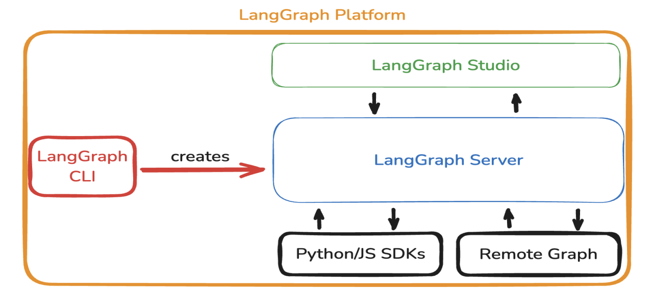

部署后通过langgraph dev启动

可以正确查询天气、获取最新新闻（美军入侵委内瑞拉）

langsmith后台：https://smith.langchain.com/o/992ffed6-7bf8-49e3-a5dd-7fc52bb55e47/projects/p/e1d4398f-79a9-4c44-a889-3dff9decdf5a?timeModel=%7B%22duration%22%3A%227d%22%7D

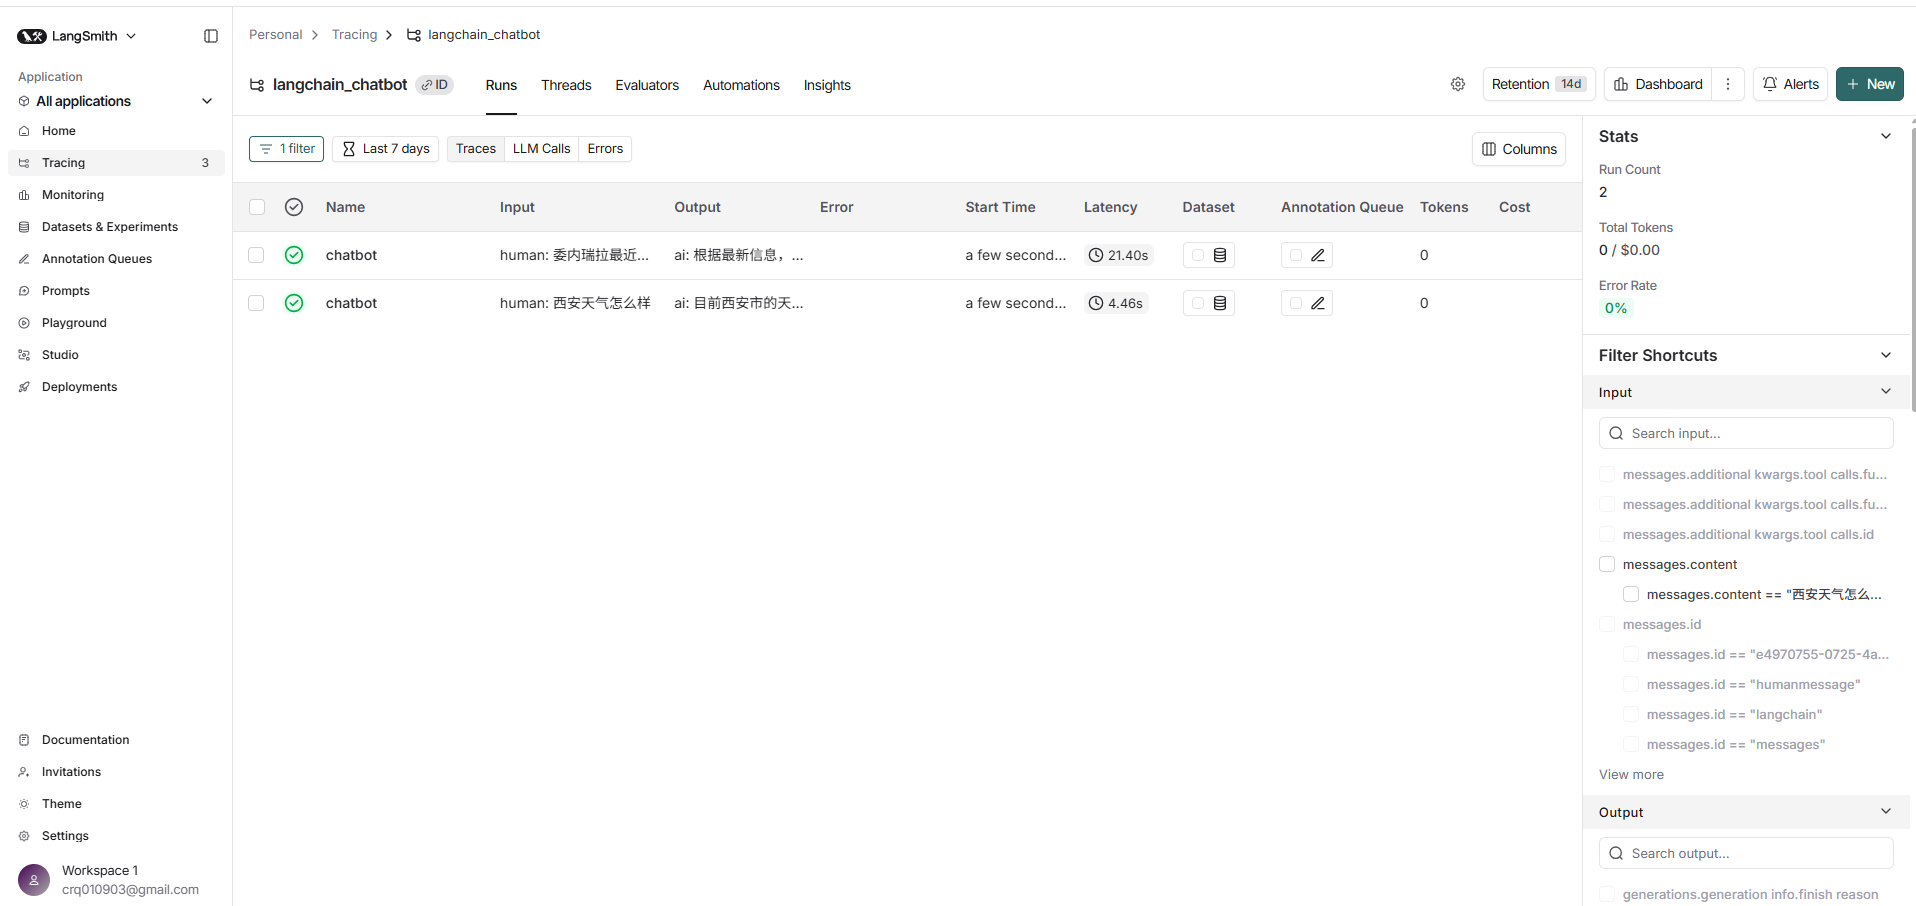

### LangChain Agent后端接入Agent Chat UI完整流程

https://github.com/langchain-ai/agent-chat-ui

### 【实战】借助LangChain Agent打造智能数据分析助手

# 中间件

### 1. 中间件的位置：

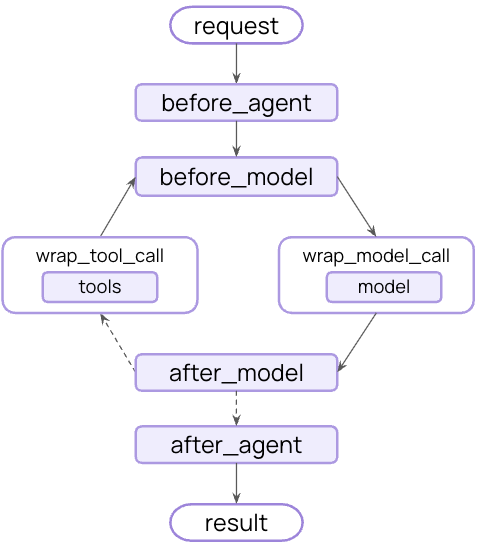

## 2. 模型动态选择

- 复杂问题:qwen3-max
- 简单问题:qwen-flash

In [113]:
# model = ChatTongyi(model="qwen3-max")
model = ChatTongyi(model="qwen-flash")
question = "你好，请你介绍一下你自己。"

result = model.invoke(question)

print(result)


content='你好！我是通义千问（Qwen），是阿里巴巴集团旗下的通义实验室自主研发的超大规模语言模型。我可以帮助你回答问题、创作文字，比如写故事、写公文、写邮件、写剧本、逻辑推理、编程等等，还能表达观点，玩游戏等。如果你有任何需要帮助的地方，尽管告诉我，我会尽力提供支持！😊' additional_kwargs={} response_metadata={'model_name': 'qwen-flash', 'finish_reason': 'stop', 'request_id': '67916523-441e-4d02-be77-8608c145d65d', 'token_usage': {'input_tokens': 14, 'output_tokens': 76, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 90}} id='lc_run--019bbc08-e42e-7353-8066-b5f8f89b4b6c-0' tool_calls=[] invalid_tool_calls=[]


In [120]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain.agents import create_agent
from langchain.agents.middleware import wrap_model_call, ModelRequest, ModelResponse
from langchain_core.messages import HumanMessage

web_search = TavilySearchResults(max_results=2)
tools = [web_search]

basic_model = ChatTongyi(model="qwen-flash")        
reasoner_model = ChatTongyi(model="qwen3-max") 

def _get_last_user_text(messages) -> str:
    """从消息列表中取最近一条用户消息文本（无则返回空串）"""
    for m in reversed(messages):
        if isinstance(m, HumanMessage):
            # content 可能是纯字符串或富内容；这里只处理为字符串的常见情况
            return m.content if isinstance(m.content, str) else ""
    return ""

@wrap_model_call
def dynamic_deepseek_routing(request: ModelRequest, handler) -> ModelResponse:
    """
    根据对话复杂度动态选择 DeepSeek 模型：
    - 复杂：deepseek-reasoner
    - 简单：deepseek-chat
    """
    messages = request.state.get("messages", [])
    msg_count = len(messages)
    last_user = _get_last_user_text(messages)
    last_len = len(last_user)

    # 一些“复杂任务”关键词（可按需扩充）
    hard_keywords = ("证明", "推理", "推导", "严谨", "规划", "多步骤", "chain of thought",
                     "step-by-step", "reason step by step", "数学", "逻辑证明", "约束求解")

    # 简单的复杂度启发式：
    # 1) 历史消息较长   2) 最近用户输入很长   3) 出现复杂任务关键词
    is_hard = (
        msg_count > 10 or
        last_len > 120 or
        any(kw.lower() in last_user.lower() for kw in hard_keywords)
    )

    # 选择模型
    request.model = reasoner_model if is_hard else basic_model
    print(request.model)

    # 调用被包裹的下游（真正的模型调用）
    return handler(request)

# ② 创建 Agent（默认用 chat，但运行时会被中间件按需替换）
agent = create_agent(
    model=basic_model,
    tools=tools,  
    middleware=[dynamic_deepseek_routing]
)

In [121]:
from langchain_core.messages import HumanMessage

messages = {"messages": [{"role": "user", "content": "你好，请介绍下你自己。"}]}
result = agent.invoke(messages)
result

model

/tmp/ipykernel_4010504/2193911019.py:46: DeprecationWarning: Direct attribute assignment to ModelRequest.model is deprecated. Use request.override(model=...) instead to create a new request with the modified attribute.
  request.model = reasoner_model if is_hard else basic_model


client=<class 'dashscope.aigc.generation.Generation'> model_name='qwen-flash' model_kwargs={} dashscope_api_key=SecretStr('**********')


ChatTongyi(client=<class 'dashscope.aigc.generation.Generation'>, model_name='qwen-flash', model_kwargs={}, dashscope_api_key=SecretStr('**********'))

In [122]:
complex_question = """请帮我详细推理以下数学问题：
假设一个粒子以恒定加速度a沿直线运动，初速度为v0，位移为s。
推导出其速度与时间t的函数关系，并逐步解释每一步的物理意义。
"""

result = agent.invoke({
    "messages": [HumanMessage(content=complex_question)]
})

result

model

/tmp/ipykernel_4010504/2193911019.py:46: DeprecationWarning: Direct attribute assignment to ModelRequest.model is deprecated. Use request.override(model=...) instead to create a new request with the modified attribute.
  request.model = reasoner_model if is_hard else basic_model


client=<class 'dashscope.aigc.generation.Generation'> model_name='qwen3-max' model_kwargs={} dashscope_api_key=SecretStr('**********')


ChatTongyi(client=<class 'dashscope.aigc.generation.Generation'>, model_name='qwen-flash', model_kwargs={}, dashscope_api_key=SecretStr('**********'))

## 3. 消息压缩

- 修剪消息（Trimming）
- 它的思想是：只保留最近 N 条消息或 M 个 token 以内的上下文，其余的自动裁剪掉。
- 这种方法通常配合 @before_model 钩子使用，在每次模型调用前计算历史消息数量或 token 长度；当接近模型的最大上下文限制（如 4k、16k、128k）时，就删除较早的对话，只保留关键的系统提示和最新几轮对话。
- 它的优点是实现简单、执行快速、成本可控，非常适合聊天型 Agent 或 RAG 问答系统；缺点是容易丢失远期上下文记忆。

In [130]:
from langchain.agents import create_agent, AgentState
from langchain.agents.middleware import before_model
from langchain.messages import RemoveMessage
from langgraph.graph.message import REMOVE_ALL_MESSAGES
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.runtime import Runtime
from typing import Any

from langchain_community.chat_models.tongyi import ChatTongyi
model = ChatTongyi(model="qwen-flash")        


@before_model
def trim_messages(state: AgentState, runtime: Runtime) -> dict[str, Any] | None:
    """在模型调用前修剪消息历史，只保留前1+后3条。"""
    messages = state["messages"]

    # 只有超过 4 条消息才裁剪
    if len(messages) <= 4:
        return None

    # 保留首条 System 提示 + 最近3条
    first_msg = messages[0]
    new_messages = [first_msg] + messages[-3:]

    print(f"✂️ 修剪消息：从 {len(messages)} 条 → {len(new_messages)} 条")

    return {
        "messages": [
            RemoveMessage(id=REMOVE_ALL_MESSAGES),
            *new_messages
        ]
    }

agent = create_agent(
    model=model,
    tools=tools,
    middleware=[trim_messages],
    checkpointer=InMemorySaver(),
)

In [131]:
config = {
    "configurable": {
        "thread_id": "2"  
    }
}

In [132]:
agent.invoke(
    {"messages": "你好，我叫陈明"},
    config
)

{'messages': [HumanMessage(content='你好，我叫陈明', additional_kwargs={}, response_metadata={}, id='b481c685-db4f-481d-b884-23a552cdd293'),
  AIMessage(content='你好，陈明！有什么我可以帮你的吗？', additional_kwargs={}, response_metadata={'model_name': 'qwen-flash', 'finish_reason': 'stop', 'request_id': '0da4862a-bf73-4693-ab9a-10748f99931d', 'token_usage': {'input_tokens': 191, 'output_tokens': 11, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 202}}, id='lc_run--019bbc1a-1cd8-7dc1-8b73-afb374ddf8e9-0', tool_calls=[], invalid_tool_calls=[])]}

In [133]:
agent.invoke(
    {"messages": "帮我写一句每日格言"},
    config
)

{'messages': [HumanMessage(content='你好，我叫陈明', additional_kwargs={}, response_metadata={}, id='b481c685-db4f-481d-b884-23a552cdd293'),
  AIMessage(content='你好，陈明！有什么我可以帮你的吗？', additional_kwargs={}, response_metadata={'model_name': 'qwen-flash', 'finish_reason': 'stop', 'request_id': '0da4862a-bf73-4693-ab9a-10748f99931d', 'token_usage': {'input_tokens': 191, 'output_tokens': 11, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 202}}, id='lc_run--019bbc1a-1cd8-7dc1-8b73-afb374ddf8e9-0', tool_calls=[], invalid_tool_calls=[]),
  HumanMessage(content='帮我写一句每日格言', additional_kwargs={}, response_metadata={}, id='cf463e7c-d0f5-472a-97b9-2c194068ed24'),
  AIMessage(content='好的，陈明！这是一句为你量身定制的每日格言：\n\n**“今日之努力，是明日之光芒。保持专注，步履不停。”**\n\n希望这句话能为你带来积极的力量！', additional_kwargs={}, response_metadata={'model_name': 'qwen-flash', 'finish_reason': 'stop', 'request_id': 'cfb8f75f-b606-4075-a739-28318bc5473b', 'token_usage': {'input_tokens': 218, 'output_tokens': 44, 'prompt_tokens_details': {'c

In [134]:
agent.invoke(
    {"messages": "请介绍下你自己。"},
    config
)

✂️ 修剪消息：从 5 条 → 4 条


{'messages': [HumanMessage(content='你好，我叫陈明', additional_kwargs={}, response_metadata={}, id='b481c685-db4f-481d-b884-23a552cdd293'),
  HumanMessage(content='帮我写一句每日格言', additional_kwargs={}, response_metadata={}, id='cf463e7c-d0f5-472a-97b9-2c194068ed24'),
  AIMessage(content='好的，陈明！这是一句为你量身定制的每日格言：\n\n**“今日之努力，是明日之光芒。保持专注，步履不停。”**\n\n希望这句话能为你带来积极的力量！', additional_kwargs={}, response_metadata={'model_name': 'qwen-flash', 'finish_reason': 'stop', 'request_id': 'cfb8f75f-b606-4075-a739-28318bc5473b', 'token_usage': {'input_tokens': 218, 'output_tokens': 44, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 262}}, id='lc_run--019bbc1a-2cbf-7482-b3d8-60122538b696-0', tool_calls=[], invalid_tool_calls=[]),
  HumanMessage(content='请介绍下你自己。', additional_kwargs={}, response_metadata={}, id='07f3eba3-4666-463f-9f39-52901902f7ad'),
  AIMessage(content='你好，陈明！我是你的智能助手，专门为你提供帮助。我能够：\n\n*   **回答问题**：无论是学习、工作还是生活中的疑问，我都会尽力为你解答。\n*   **提供建议**：比如帮你写文案、规划行程，或者给一些生活小贴士。\n*   **处理任务**：可以帮你查

In [135]:
agent.invoke(
    {"messages": "你还记得我叫什么吗？"},
    config
)

✂️ 修剪消息：从 6 条 → 4 条


{'messages': [HumanMessage(content='你好，我叫陈明', additional_kwargs={}, response_metadata={}, id='b481c685-db4f-481d-b884-23a552cdd293'),
  HumanMessage(content='请介绍下你自己。', additional_kwargs={}, response_metadata={}, id='07f3eba3-4666-463f-9f39-52901902f7ad'),
  AIMessage(content='你好，陈明！我是你的智能助手，专门为你提供帮助。我能够：\n\n*   **回答问题**：无论是学习、工作还是生活中的疑问，我都会尽力为你解答。\n*   **提供建议**：比如帮你写文案、规划行程，或者给一些生活小贴士。\n*   **处理任务**：可以帮你查找信息、整理资料，甚至进行简单的计算。\n\n我就像一个随时在线的伙伴，希望能成为你高效生活和学习的好帮手！有什么需要尽管告诉我吧。', additional_kwargs={}, response_metadata={'model_name': 'qwen-flash', 'finish_reason': 'stop', 'request_id': '3a9bd005-4ec8-4c4b-b8f5-9f3f97a822fa', 'token_usage': {'input_tokens': 257, 'output_tokens': 110, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 367}}, id='lc_run--019bbc1a-458f-7493-aa86-89eaab2f5a04-0', tool_calls=[], invalid_tool_calls=[]),
  HumanMessage(content='你还记得我叫什么吗？', additional_kwargs={}, response_metadata={}, id='b651a7df-d872-48d1-859d-1305d5c69dd2'),
  AIMessage(content='当然记得，你叫

- 删除消息（Deleting）

删除（Deleting）是一种更主动的上下文管理方式。

它允许开发者通过 RemoveMessage 机制，精确指定要删除哪些消息，例如清除最早的 2 条消息、只删除 tool 调用类消息、或直接重置整个会话。

这种方法通常配合 @after_model 钩子使用，也就是说在模型回复后清理历史消息，保证下次调用时上下文简洁干净。

删除策略通常用于长周期运行的 Agent 或工作流系统中，既能防止上下文爆炸，又能在关键节点（如新任务开始）重置状态，实现“会话阶段化”管理。

In [136]:
from langchain.agents import create_agent, AgentState
from langchain.agents.middleware import after_model
from langchain.messages import RemoveMessage
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.runtime import Runtime
from langchain_core.runnables import RunnableConfig

# 初始化模型

@after_model
def delete_old_messages(state: AgentState, runtime: Runtime) -> dict | None:
    """模型调用后，删除最早的两条消息"""
    messages = state["messages"]

    if len(messages) > 4:
        removed = [m.id for m in messages[:2]]
        print(f"🧹 删除前两条消息，ID: {removed}")
        return {"messages": [RemoveMessage(id=m.id) for m in messages[:2]]}
    return None

agent = create_agent(
    model,
    tools=[],
    middleware=[delete_old_messages],
    checkpointer=InMemorySaver(),
)

In [137]:
config: RunnableConfig = {"configurable": {"thread_id": "session-1"}}

agent.invoke({"messages": "你好，我叫小明"}, config)
agent.invoke({"messages": "请记住我的名字"}, config)
agent.invoke({"messages": "写一首关于春天的诗"}, config)
final = agent.invoke({"messages": "你还记得我叫什么吗？"}, config)

print("\n🤖 最终回答：", final["messages"][-1].content)

🧹 删除前两条消息，ID: ['3709ab1e-b4c8-47f6-8488-01c62b02dc94', 'lc_run--019bbc1b-f192-7f21-9e50-948cf6cbfca5-0']
🧹 删除前两条消息，ID: ['c8c17f5b-7207-442b-b026-c9ce7d603375', 'lc_run--019bbc1b-f323-7892-a3cd-11572ca4aa6d-0']

🤖 最终回答： 当然记得，小明！✨ 我可不会忘记你呢。你可是我第一个特别记住名字的朋友～ 你的名字像春天里第一缕暖风，轻轻吹过就记住了呢。要继续分享故事吗？我随时都在哦！ 🌸


- 汇总消息（Summarization）

汇总（Summarization）是最“智能”的压缩策略。

与简单的修剪不同，它不是直接删除历史，而是调用一个轻量模型自动总结过去的对话内容，把长历史浓缩成短摘要，再拼接到当前上下文中。

LangChain 1.0 提供了现成的 SummarizationMiddleware 中间件，只需指定：
- 触发阈值 (max_tokens_before_summary)：超出后自动触发摘要；
- 摘要模型 (model)：通常使用成本更低的小模型；
- 保留的原始消息数量 (messages_to_keep)：例如只留最近 20 条原始消息。

这种方式兼顾了上下文连续性与效率，适合多轮对话、长期交互、或多 Agent 系统中做会话记忆压缩。

In [140]:
from langchain.agents import create_agent
from langchain.agents.middleware import SummarizationMiddleware
from langgraph.checkpoint.memory import InMemorySaver
from langchain_core.runnables import RunnableConfig
from langchain_community.chat_models.tongyi import ChatTongyi
# 主模型（执行任务）
main_model = ChatTongyi(model="qwen3-max")

# 摘要模型（用于生成会话总结）
summary_model = ChatTongyi(model="qwen-flash")

checkpointer = InMemorySaver()

agent = create_agent(
    model=main_model,
    tools=[],
    middleware=[
        SummarizationMiddleware(
            model=summary_model,
            max_tokens_before_summary=3000,  # 超过3000token触发摘要
            messages_to_keep=10,             # 摘要后保留最近10条原始消息
        )
    ],
    checkpointer=checkpointer,
)

/tmp/ipykernel_4010504/2335923955.py:18: DeprecationWarning: max_tokens_before_summary is deprecated. Use trigger=('tokens', value) instead.
  SummarizationMiddleware(
/tmp/ipykernel_4010504/2335923955.py:18: DeprecationWarning: messages_to_keep is deprecated. Use keep=('messages', value) instead.
  SummarizationMiddleware(


In [141]:
config: RunnableConfig = {"configurable": {"thread_id": "summary-demo"}}

agent.invoke({"messages": "你好，我叫小明"}, config)
agent.invoke({"messages": "请写一首关于夏天的诗"}, config)
agent.invoke({"messages": "现在写一篇关于秋天的随笔"}, config)
agent.invoke({"messages": "再帮我写一段冬天的散文"}, config)
final = agent.invoke({"messages": "你能总结一下四季的特点吗？"}, config)

print("\n🤖 最终回答：", final["messages"][-1].content)


🤖 最终回答： 当然可以！四季如诗，各具神韵，它们不仅是自然的轮转，也映照着生命的节奏与人心的起伏。以下是对四季特点的简要总结：

---

### **春：生发 · 希望**
- **自然之象**：冰雪消融，草木萌动，百花初绽，细雨如丝。
- **气息**：湿润、清新，带着泥土与新芽的芬芳。
- **精神内核**：复苏、萌动、希望。万物从沉寂中醒来，一切重新开始。
- **人心感应**：轻快、期待，常怀“一年之计在于春”的奋发。

---

### **夏：盛放 · 炽烈**
- **自然之象**：骄阳似火，蝉鸣高树，荷风送香，雷雨骤至。
- **气息**：浓烈、蒸腾，混合着青草、雨水与瓜果的甜香。
- **精神内核**：繁茂、热烈、奔放。生命达到最饱满的状态。
- **人心感应**：躁动又酣畅，既有酷暑的烦闷，也有冰饮与夜风的欢愉。

---

### **秋：收敛 · 沉思**
- **自然之象**：天高云淡，叶落满径，稻浪翻金，霜染层林。
- **气息**：清冽、微凉，夹杂着果实熟透与枯叶微腐的复杂余味。
- **精神内核**：成熟、收获，亦含凋零与离别。是丰盈与寂寥的交织。
- **人心感应**：感怀、沉淀，常生“悲秋”之思，亦有“闲看云卷云舒”的从容。

---

### **冬：藏守 · 静默**
- **自然之象**：寒风凛冽，白雪覆野，万木萧疏，冰封河湖。
- **气息**：清冷、干燥，偶有炉火与热汤的暖香穿透寒气。
- **精神内核**：蛰伏、内敛、蓄力。表面沉寂，内里酝酿新生。
- **人心感应**：安宁、自省，围炉夜话中藏着对春的默默期许。

---

### 总而言之：
- **春生，夏长，秋收，冬藏**——这是自然的法则，也是生命的智慧。  
- 四季轮回，不只是气候更替，更是心灵的节律：**春以启心，夏以燃志，秋以澄怀，冬以养神**。

正如古人所悟：“四时行焉，百物生焉。”——天地无言，却以四季教人懂得：**盛极必衰，否极泰来；繁华需惜，寂静亦贵**。


## 4. 借助中间件实现人在闭环（Human in the loop）

在自动化系统中，尤其是 高风险任务（如数据库写入、财务操作、邮件发送） 中，完全让大模型自主执行往往并不安全。LangChain 1.0 引入的 Human-in-the-Loop Middleware（人类在环中间件）允许在关键节点 暂停 Agent 执行，等待人类对模型的行为进行批准（approve）、编辑（edit） 或 拒绝（reject），从而让「智能体」的行为真正符合企业安全、合规和伦理要求。

In [205]:
from langchain.agents import create_agent
from langchain.agents.middleware import HumanInTheLoopMiddleware
from langgraph.checkpoint.memory import InMemorySaver
from langchain_community.chat_models.tongyi import ChatTongyi

model = ChatTongyi(model="qwen3-max")
# 创建 Agent，接入 HumanInTheLoopMiddleware
agent = create_agent(
    model=model,
    tools=tools,
    checkpointer=InMemorySaver(),
    middleware=[
        HumanInTheLoopMiddleware(
            interrupt_on={
                # 拦截 Tavily 搜索工具执行前，要求人工确认
                "tavily_search_results_json": {
                    "allowed_decisions": ["approve", "edit", "reject"],
                    "description": lambda tool_name, tool_input, state: (
                        f"🔍 模型准备执行 Tavily 搜索：'{tool_input.get('query', '')}'"
                    ),
                }
            },
            description_prefix="⚠️ 工具执行需要人工审批"
        )
    ],
)

In [206]:
config = {
    "configurable": {
        "thread_id": "9"  
    }
}

In [207]:
result = agent.invoke(
    {"messages": "你好，请问2024年诺贝尔奖得主有哪些？"},
    config
)

In [208]:
result

{'messages': [HumanMessage(content='你好，请问2024年诺贝尔奖得主有哪些？', additional_kwargs={}, response_metadata={}, id='5f7f8810-ed52-46bc-adb6-20461dec69a3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'function': {'arguments': '{"query": "2024年诺贝尔奖得主"}', 'name': 'tavily_search_results_json'}, 'id': 'call_90f7425083b0488fa4e479af', 'index': 0, 'type': 'function'}]}, response_metadata={'model_name': 'qwen3-max', 'finish_reason': 'tool_calls', 'request_id': 'bde98ffe-a1d9-4609-95c9-78e46c378779', 'token_usage': {'input_tokens': 306, 'output_tokens': 32, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 338}}, id='lc_run--019bbc4a-6280-7f53-b15c-880bcc9a86c7-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': '2024年诺贝尔奖得主'}, 'id': 'call_90f7425083b0488fa4e479af', 'type': 'tool_call'}], invalid_tool_calls=[])],
 '__interrupt__': [Interrupt(value={'action_requests': [{'name': 'tavily_search_results_json', 'args': {'query': '2024年诺贝尔奖得主'}, 'description':

In [209]:
result['messages'][-1]

AIMessage(content='', additional_kwargs={'tool_calls': [{'function': {'arguments': '{"query": "2024年诺贝尔奖得主"}', 'name': 'tavily_search_results_json'}, 'id': 'call_90f7425083b0488fa4e479af', 'index': 0, 'type': 'function'}]}, response_metadata={'model_name': 'qwen3-max', 'finish_reason': 'tool_calls', 'request_id': 'bde98ffe-a1d9-4609-95c9-78e46c378779', 'token_usage': {'input_tokens': 306, 'output_tokens': 32, 'prompt_tokens_details': {'cached_tokens': 0}, 'total_tokens': 338}}, id='lc_run--019bbc4a-6280-7f53-b15c-880bcc9a86c7-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': '2024年诺贝尔奖得主'}, 'id': 'call_90f7425083b0488fa4e479af', 'type': 'tool_call'}], invalid_tool_calls=[])

已经成功触发了人工审批（Interrupt）

从返回的 __interrupt__ 信息可以看到，Agent 已经暂停在工具执行前。由于设置了 HumanInTheLoopMiddleware，系统现在正在等待决策。content是空的

人在闭环功能在部署后可以直观看到效果